In [ ]:
#%pip install tensorflow==2.11.*

In [ ]:
#%pip install -q -U keras-tuner

In [1]:
#compatibility check
import sys
print(sys.version)
import pip
print(pip.__version__)

3.9.13 (main, Oct 13 2022, 16:12:30) 
[Clang 12.0.0 ]
22.3.1


/Users/nicolerangan/.conda/envs/LING167/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [15]:
#necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

from datetime import datetime

In [3]:
#assert library import
assert pd.__version__ >= '1.0.0'
assert np.__version__ >= '1.0.0'
assert tf.__version__ >= '2.0.0'
assert plt
assert Sequential
assert Dense
assert Dropout
assert BatchNormalization
assert Adam
assert l2
assert train_test_split
assert LabelEncoder
assert kt
assert tf.__version__ >= "2.0.0"

In [28]:
#read csv
df = pd.read_csv('cleaned_data_final.csv')

#a peek at our dataset
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,False,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,True,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,True,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,False,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,False,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,False,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,True,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,False,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,True,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#turn labels to 0 and 1s
df['radiant_win'] = df['radiant_win'].replace({True: 1, False: 0})
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,0,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,1,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,1,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,0,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,0,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,0,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,1,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,0,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,1,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 4:], df[['radiant_win']], test_size=0.2, random_state=42)
X_train.shape[1]

246

In [31]:
#convert numpy arrays of training to tensors, set to tf.float32
X_train_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [38]:
#hyperparameter tuning dictionary that will be searched on
params = {
    'learning_rate': [0.001, 0.01, 1.0],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'n_estimators': [50, 100, 150, 200],
    'regularization_strength': [0.01, 0.1]
}

Logistic Regression 

In [39]:
def create_model(learning_rate=0.01, activation='relu', regularization_strength=0.01, n_estimators=100):
    model = Sequential()
    model.add(Dense(1, activation='sigmoid', input_shape=(246,), kernel_regularizer=l2(regularization_strength)))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, verbose=0)


/var/folders/zr/l3b0jnnd4rs2n6yf0p7__f500000gn/T/ipykernel_54900/3749733396.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose=0)


In [40]:
search= RandomizedSearchCV(estimator= model, param_distributions= params, cv=2, verbose=3)
search_result= search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END activation=sigmoid, learning_rate=0.001, n_estimators=50, regularization_strength=0.01;, score=0.548 total time=   2.5s
[CV 2/2] END activation=sigmoid, learning_rate=0.001, n_estimators=50, regularization_strength=0.01;, score=0.547 total time=   2.2s
[CV 1/2] END activation=tanh, learning_rate=0.01, n_estimators=150, regularization_strength=0.1;, score=0.512 total time=   2.2s
[CV 2/2] END activation=tanh, learning_rate=0.01, n_estimators=150, regularization_strength=0.1;, score=0.514 total time=   2.2s
[CV 1/2] END activation=tanh, learning_rate=0.001, n_estimators=150, regularization_strength=0.01;, score=0.548 total time=   2.2s
[CV 2/2] END activation=tanh, learning_rate=0.001, n_estimators=150, regularization_strength=0.01;, score=0.547 total time=   2.2s
[CV 1/2] END activation=relu, learning_rate=1.0, n_estimators=200, regularization_strength=0.1;, score=0.506 total time=   2.2s
[CV 2/2] END activation=r

In [41]:
print(search_result.best_params_)

{'regularization_strength': 0.01, 'n_estimators': 50, 'learning_rate': 0.001, 'activation': 'relu'}


In [42]:
best_params = search_result.best_params_

model = create_model(learning_rate=best_params['learning_rate'],
                     activation=best_params['activation'], 
                     regularization_strength=best_params['regularization_strength'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6944 - accuracy: 0.5369 - val_loss: 0.6902 - val_accuracy: 0.5510
Epoch 2/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6897 - accuracy: 0.5535 - val_loss: 0.6900 - val_accuracy: 0.5509
Epoch 3/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5547 - val_loss: 0.6901 - val_accuracy: 0.5529
Epoch 4/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5522 - val_loss: 0.6899 - val_accuracy: 0.5516
Epoch 5/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6896 - accuracy: 0.5518 - val_loss: 0.6902 - val_accuracy: 0.5504
Epoch 6/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5534 - val_loss: 0.6900 - val_accuracy: 0.5506
Epoch 7/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5533 - val_loss: 0.6903 - val_ac

2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5517 - val_loss: 0.6904 - val_accuracy: 0.5489
Epoch 58/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5543 - val_loss: 0.6899 - val_accuracy: 0.5497
Epoch 59/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6898 - accuracy: 0.5528 - val_loss: 0.6898 - val_accuracy: 0.5508
Epoch 60/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5536 - val_loss: 0.6898 - val_accuracy: 0.5497
Epoch 61/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6897 - accuracy: 0.5526 - val_loss: 0.6900 - val_accuracy: 0.5530
Epoch 62/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5522 - val_loss: 0.6899 - val_accuracy: 0.5499
Epoch 63/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6898 - accuracy: 0.5532 - val_loss: 0.6900 - val_accuracy

In [43]:
#evaluate test accuracy
test_loss, test_acc = model.evaluate(X_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

573/573 [==============================] - 1s 931us/step - loss: 0.6902 - accuracy: 0.5508
Test Loss: 0.6902
Test Accuracy: 0.5508


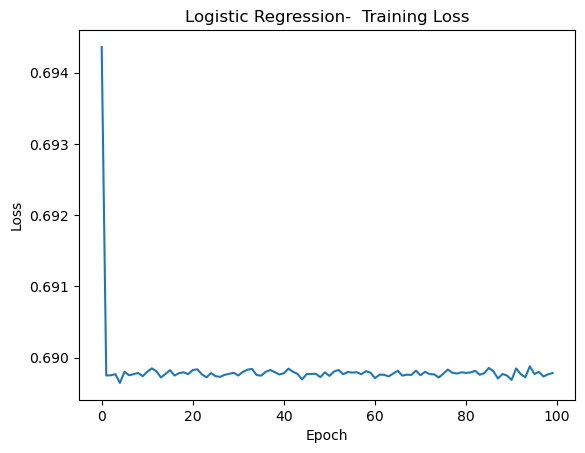

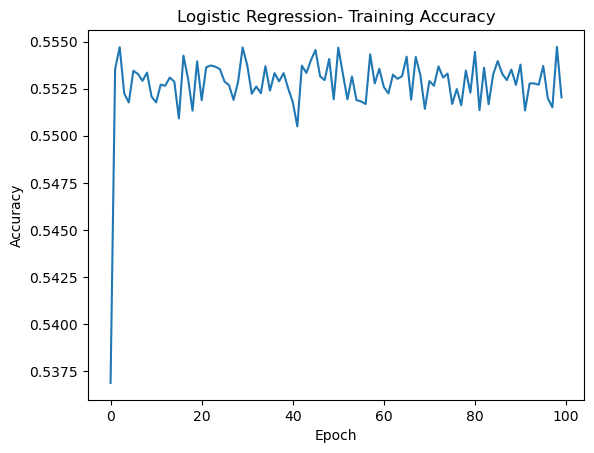

In [45]:
#training loss plot
plt.plot(history.history['loss'])
plt.title('Logistic Regression-  Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#training accuracy plot
plt.plot(history.history['accuracy'])
plt.title('Logistic Regression- Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()